In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from bounce import state
from bounce import driver
import numpy as np

In [3]:
initial_state = state.State(planets=[{"m":0.001, "a":0.1, "h":0.1, "k":0.15, "l":1.0}])
initial_state.hillRadiusFactor = 1.
np.random.seed(2018)
obs = driver.create_obs(initial_state, 100, 5.0e-4, 5.0e-5, 1.0)

# Emcee

In [4]:
label = 'Emcee tour test'
N_walkers = 20
N_iterations = 1000*N_walkers
emcee_init_scale = {"m":0.0001, "a":.01, "h":0.01, "k":0.01, "l":0.01*2.*np.pi}
emcee_bundle, emcee_bundle_hash = driver.run_emcee(label, 
                                                   N_iterations, 
                                                   initial_state, 
                                                   obs,
                                                   N_walkers,
                                                   emcee_init_scale)

Progress: 0.1%, time: 2017-10-20 04:34:49.569104
Invalid state was proposed (h & k)
Collision! 2017-10-20 04:35:09.086443
Invalid state was proposed (m)
Collision! 2017-10-20 04:35:12.431521
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Collision! 2017-10-20 04:35:16.770199
Collision! 2017-10-20 04:35:17.053210
Invalid state was proposed (h & k)
Collision! 2017-10-20 04:35:19.349308
Collision! 2017-10-20 04:35:21.476841
Invalid state was proposed (m)
Invalid state was proposed (h & k)
Invalid state was proposed (m)
Collision! 2017-10-20 04:35:26.104738
Collision! 2017-10-20 04:35:26.646907
Collision! 2017-10-20 04:35:27.168614
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Collision! 2017-10-20 04:35:29.433685
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Collision! 2017-10-20 0

In [5]:
driver.return_trimmed_results(emcee_bundle, 40, [12,4], 0.7, plotting=False)

Eliminated burn in, sampled every 1.


In [6]:
driver.plot_ACTimes(emcee_bundle, [12,4], 0.2, plotting=False)

AC time [ 18.3        27.0540314]
AC time [ 17.45        23.52065806]
AC time [ 18.45        26.70119529]
AC time [ 20.2         27.42209889]
AC time [ 19.6         28.76548679]


In [7]:
driver.tness(emcee_bundle)

# M.-H.

In [8]:
label = 'MH tour test'
N_iterations = 10000
mh_scales = {"m":0.0001, "a":.01, "h":0.01, "k":0.01, "l":0.02*2.*np.pi}
stepsize = 4.e-1
mh_bundle, mh_bundle_hash = driver.run_mh(label, 
                                          N_iterations, 
                                          initial_state, 
                                          obs,
                                          mh_scales,
                                          stepsize,
                                          printing_every=1550)

Progress: 0.01%, 1 accepted steps have been made, time: 2017-10-20 04:37:22.042155
Progress: 15.51%, 448 accepted steps have been made, time: 2017-10-20 04:37:33.031404
Progress: 31.01%, 891 accepted steps have been made, time: 2017-10-20 04:37:43.860442
Progress: 46.51%, 1338 accepted steps have been made, time: 2017-10-20 04:37:53.788604
Progress: 62.01%, 1816 accepted steps have been made, time: 2017-10-20 04:38:03.585238
Progress: 77.51%, 2281 accepted steps have been made, time: 2017-10-20 04:38:13.173123
Progress: 93.01%, 2730 accepted steps have been made, time: 2017-10-20 04:38:23.739404
Acceptance rate: 29.460%
The id of the simulation is: 6c6ec84bf5a6cfd7111e5704d18966ea
The end time of the simulation is 2017-10-20 04:38:28.553931


In [9]:
driver.return_trimmed_results(mh_bundle, 40, [12,4], 0.7, plotting=False)

Eliminated burn in, sampled every 1.


In [10]:
driver.plot_ACTimes(mh_bundle, [12,4], 0.2, plotting=False)

AC time [ 2.          4.46865272]
AC time [ 166.          227.95988369]
AC time [ 259.          344.39325449]
AC time [ 111.          107.78003034]
AC time [ 60.          85.31875829]


In [11]:
driver.tness(mh_bundle)

# HMC

In [12]:
label = 'HMC tour test'
N_iterations = 9000
HMC_masses = [10., 0.10, 0.10, 75., 1./(2.*np.pi)]
delt = 1.e-2
L=1
hmc_bundle, hmc_bundle_hash = driver.run_hmc(label, 
                                             N_iterations, 
                                             initial_state, 
                                             obs,
                                             delt,
                                             L,
                                             HMC_masses,
                                             printing_every=1550)

Progress: 0.011111%, 0 accepted steps have been made, time: 2017-10-20 04:38:28.983489
Progress: 17.233%, 325 accepted steps have been made, time: 2017-10-20 04:39:17.546204
Progress: 34.456%, 656 accepted steps have been made, time: 2017-10-20 04:40:06.961512
Progress: 51.678%, 986 accepted steps have been made, time: 2017-10-20 04:41:02.237119
Progress: 68.9%, 1325 accepted steps have been made, time: 2017-10-20 04:41:58.419876
Progress: 86.122%, 1667 accepted steps have been made, time: 2017-10-20 04:42:56.654141
Acceptance rate: 21.52%
The id of the simulation is: ac9e14f747fdfd8a64acf42d0a449ba3
The end time of the simulation is 2017-10-20 04:43:41.871553


In [13]:
driver.return_trimmed_results(hmc_bundle, 40, [12,4], 0.7, plotting=False)

Eliminated burn in, sampled every 1.


In [14]:
driver.plot_ACTimes(hmc_bundle, [12,4], 0.2, plotting=False)

AC time [ 4.          5.48924911]
AC time [ 4.          4.95944736]
AC time [ 4.          5.93835097]
AC time [ 5.          7.61431805]
AC time [  8.          10.64110638]


In [15]:
driver.tness(hmc_bundle)

# SMALA

In [16]:
label = 'SMALA tour test'
N_iterations = 2250
alpha = 1.
epsilon = 0.9
smala_bundle, smala_bundle_hash = driver.run_smala(label, 
                                          N_iterations, 
                                          initial_state, 
                                          obs,
                                          epsilon,
                                          alpha,
                                          printing_every=550)

Progress: 0.044444%, 1 accepted steps have been made, time: 2017-10-20 04:43:43.235377
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Collision! 2017-10-20 04:44:59.963307
Invalid state was proposed (h & k)
Progress: 24.489%, 270 accepted steps have been made, time: 2017-10-20 04:45:19.251734
Progress: 48.933%, 581 accepted steps have been made, time: 2017-10-20 04:46:46.906288
Progress: 73.378%, 904 accepted steps have been made, time: 2017-10-20 04:48:07.320719
Invalid state was proposed (h & k)
Collision! 2017-10-20 04:48:25.805766
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Progress: 97.822%, 1192 accepted steps have been made, time: 2017-10-20 04:49:28.767630
Acceptance rate: 54.40%
The id of the simulation is: a2b534369dbfdd6

In [17]:
driver.return_trimmed_results(smala_bundle, 40, [12,4], 0.7, plotting=False)

Eliminated burn in, sampled every 1.


In [18]:
driver.plot_ACTimes(smala_bundle, [12,4], 0.2, plotting=False)

AC time [  3.          17.23614166]
AC time [ 3.          5.29690952]
AC time [ 3.          3.59258418]
AC time [ 3.          4.51720709]
AC time [ 2.       3.01993]


In [19]:
driver.tness(smala_bundle)

# ALSMALA

In [20]:
label = 'SMALA tour test'
N_iterations = 2000
alpha = 1.0
epsilon = 0.5
bernoulliA = 5.
bernoulliB = 0.1
alsmala_bundle, alsmala_bundle_hash = driver.run_alsmala(label, 
                                                         N_iterations, 
                                                         initial_state, 
                                                         obs,
                                                         epsilon,
                                                         alpha,
                                                         bernoulliA,
                                                         bernoulliB,
                                                         printing_every=550)

Progress: 0.05%, 2 accepted steps have been made, time: 2017-10-20 04:49:36.939791
Progress: 27.55%, 372 accepted steps have been made, time: 2017-10-20 04:50:26.666150
Progress: 55.05%, 694 accepted steps have been made, time: 2017-10-20 04:50:52.217047
Progress: 82.55%, 957 accepted steps have been made, time: 2017-10-20 04:51:07.786745
Acceptance rate: 57.35%
The id of the simulation is: a2b534369dbfdd627152219798491884
The end time of the simulation is 2017-10-20 04:51:15.611924


In [21]:
driver.return_trimmed_results(alsmala_bundle, 40, [12,4], 0.7, plotting=False)

Eliminated burn in, sampled every 1.


In [22]:
driver.plot_ACTimes(alsmala_bundle, [12,4], 0.2, plotting=False)

AC time [ 10.          11.39241461]
AC time [ 14.          22.76138393]
AC time [ 6.          7.34653373]
AC time [ 14.          20.02204244]
AC time [  9.          10.84657964]


In [23]:
driver.tness(alsmala_bundle)

# Adaptive Eps SMALA

Still in development, to be completed later.

# Test all plots (Emcee)

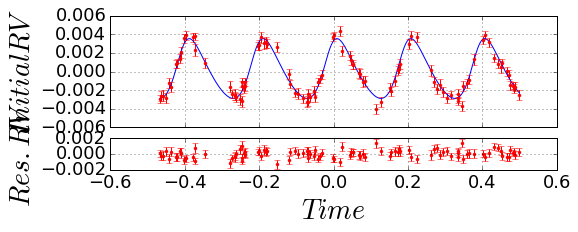

In [24]:
%matplotlib inline
driver.plot_obs(initial_state, obs, [8,2])

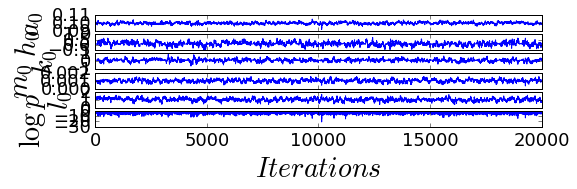

In [25]:
driver.plot_chains(emcee_bundle, [8,2])

Selected some 40 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$']
[  1.00048049e-01   1.21068433e-01   1.47623208e-01   9.80174646e-04
   1.01915340e+00]


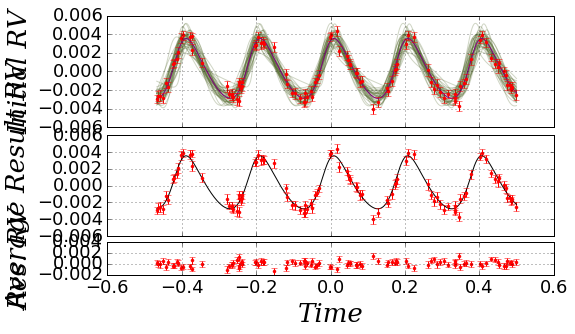

In [26]:
driver.plot_trimmed_results(emcee_bundle, 40, [8,2])

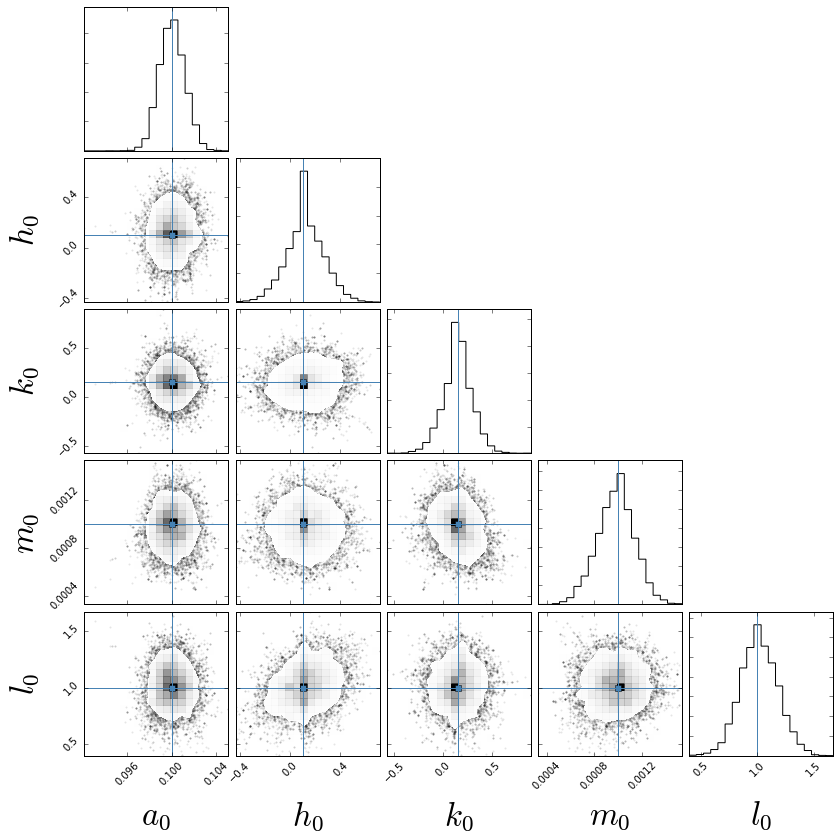

In [27]:
driver.plot_corners(emcee_bundle)
#move import statement inside the function...

AC time [ 18.3        27.0540314]
AC time [ 17.45        23.52065806]
AC time [ 18.45        26.70119529]
AC time [ 20.2         27.42209889]
AC time [ 19.6         28.76548679]


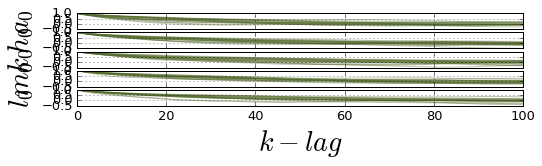

In [28]:
driver.plot_ACTimes(emcee_bundle, [8,2], fraction=0.1, plotting=True)

# Test all plots (smala)

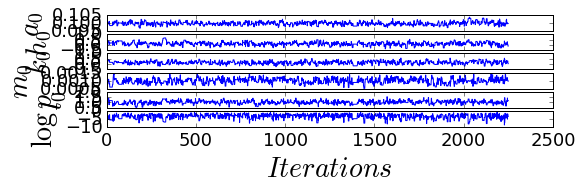

In [29]:
driver.plot_chains(smala_bundle, [8,2])

Selected some 40 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$']
[  9.98519950e-02   1.22071472e-01   1.41027314e-01   9.78307457e-04
   1.00883959e+00]


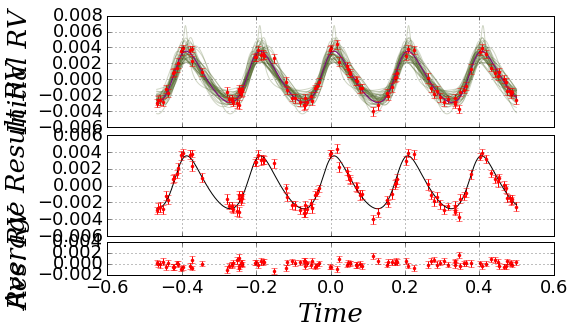

In [30]:
driver.plot_trimmed_results(smala_bundle, 40, [8,2])

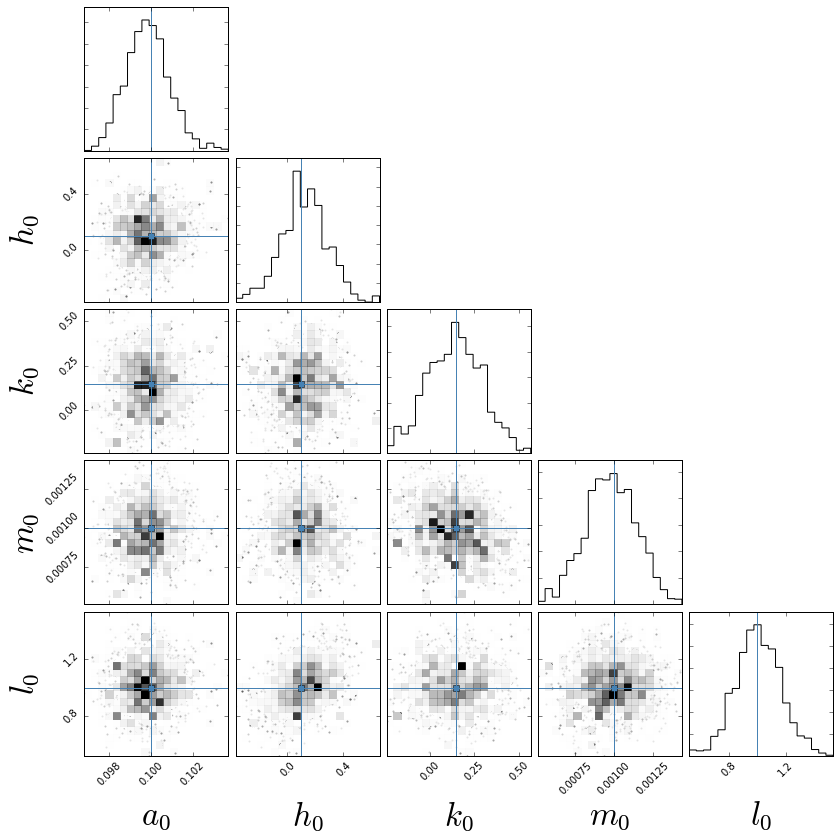

In [31]:
driver.plot_corners(smala_bundle)

AC time [  3.          17.23614166]
AC time [ 3.          5.29690952]
AC time [ 3.          3.59258418]
AC time [ 3.          4.51720709]
AC time [ 2.       3.01993]


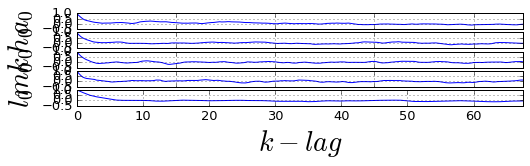

In [32]:
driver.plot_ACTimes(smala_bundle, [8,2], fraction=0.1, plotting=True)

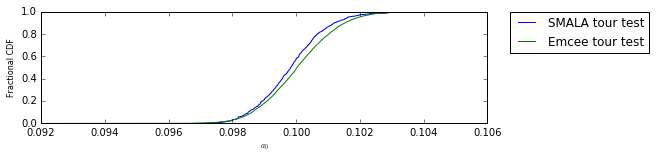

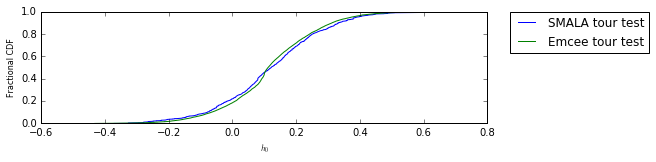

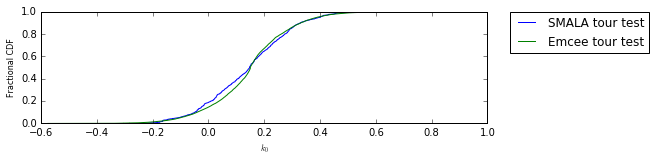

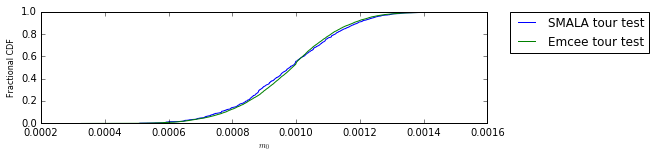

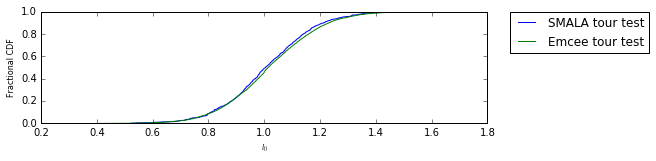

In [33]:
smala_chain, emcee_chain = smala_bundle.mcmc_chain, emcee_bundle.mcmc_chain
driver.compare_cdf(smala_bundle, emcee_bundle, [8,2], fontsize=8)